# Figure S7


[1] Brett C. Hannigan, Tyler J. Cuthbert, Chakaveh Ahmadizadeh, and Carlo Menon. Distributed Sensing Along Fibres for Smart Clothing. Science Advances. 2023 (In Review).

©2023 ETH Zurich, Brett Hannigan; D-HEST; Biomedical and Mobile Health Technology (BMHT) Lab; Carlo Menon

In [28]:
library(ggplot2)
library(cowplot)
library(magick)
library(tidyr)
library(dplyr)
library(ggh4x)
library(readxl)

## Import Images

`Experient-Setup.png` photograph of the LCR measurement device and radius bend/strain jig.

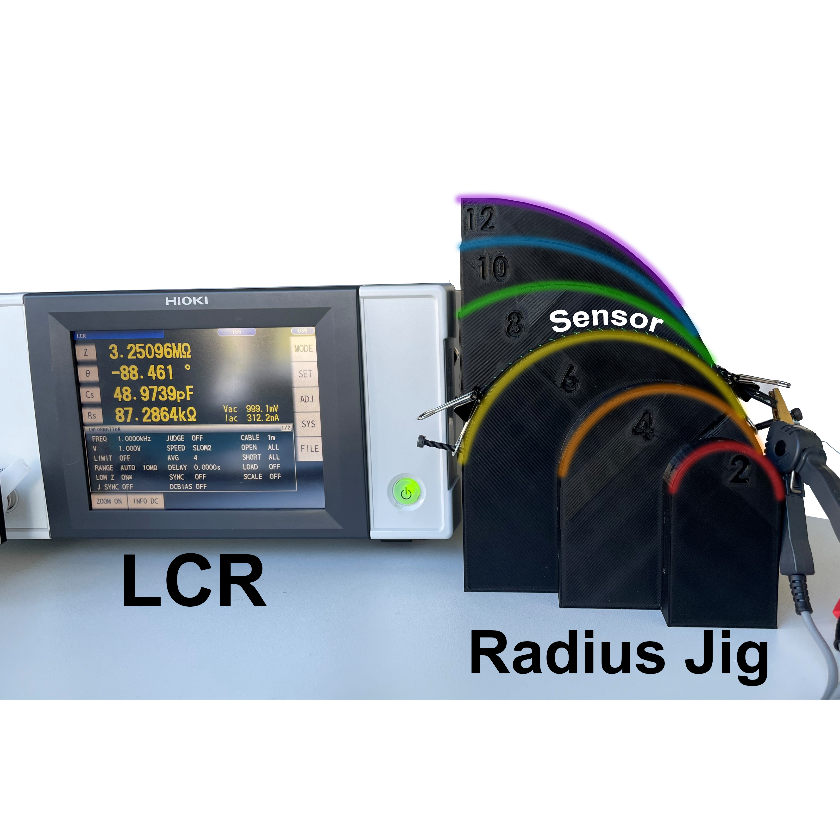

In [2]:
exp_setup <- ".\\Experiment-Setup.png"
exp_setup <- ggdraw() + draw_image(exp_setup, scale=1)
exp_setup

## Import Data

Data recorded manually in Excel format.

In [3]:
sensor_tests <- read_excel("RadiusStrain.xlsx", range="A4:K123", col_names=c("freq", "sample", "radius", "length", "nominal.strain", "strain", "Cs", "dCC0", "GF", "Zmag", "Zphase"))
radius_test <- sensor_tests[sensor_tests$freq==1000 & sensor_tests$nominal.strain!=0,]
head(radius_test)

freq sample radius length nominal.strain strain    Cs    dCC0       GF       
1 1000 1       0     11     0.2            0.1224490 50.62 0.06680717 0.5455919
2 1000 1       0     13     0.4            0.3265306 57.58 0.21348788 0.6538066
3 1000 1       0     15     0.6            0.5306122 67.15 0.41517387 0.7824431
4 1000 1      12     11     0.2            0.1224490 49.77 0.05556734 0.4537999
5 1000 1      12     13     0.4            0.3265306 56.49 0.19809120 0.6066543
6 1000 1      12     15     0.6            0.5306122 66.26 0.40530223 0.7638388
  Zmag Zphase
1 NA   NA    
2 NA   NA    
3 NA   NA    
4 NA   NA    
5 NA   NA    
6 NA   NA

## Produce Graph

A plot of average response $\frac{C(\varepsilon) - C(0)}{C(0)}$ versus bend radius, performed at three approximate strain levels: 20%, 40%, and 60%. Add smoothing line for average response and shaded region for 90% confidence intervals (across 3 samples).

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


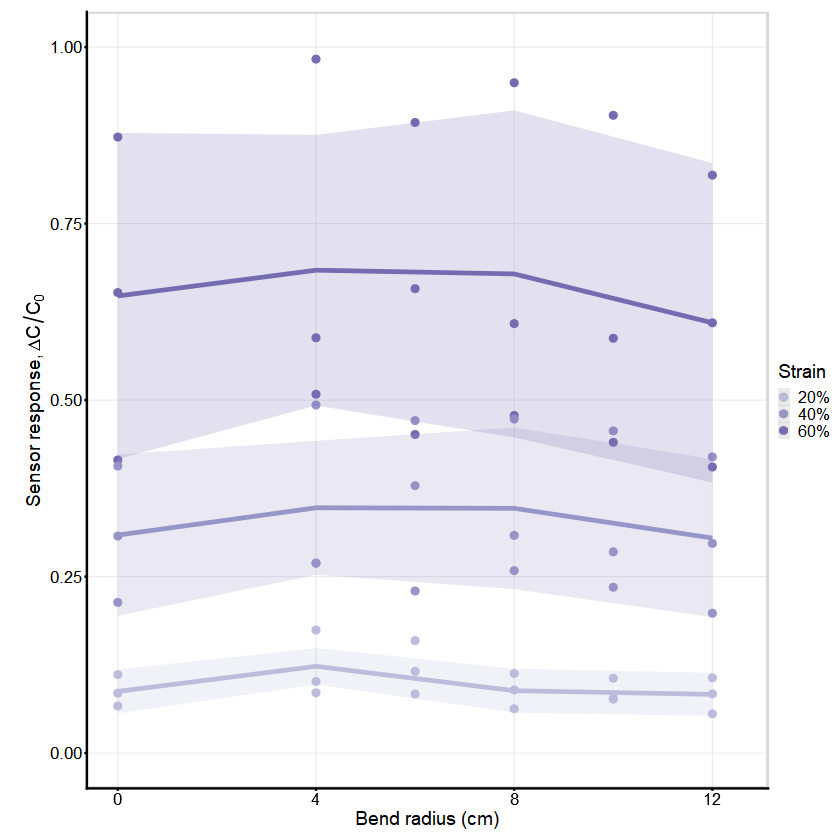

In [26]:
colour_list = c('#bcbddc', '#9794c7', '#756bb1')
plt1 <- ggplot(data=radius_test, aes(x=radius, y=dCC0, group=nominal.strain, colour=as.factor(nominal.strain)))
plt1 <- plt1 + scale_colour_manual(values=colour_list, name="Strain", labels=c("20%", "40%", "60%"))
plt1 <- plt1 + scale_fill_manual(values=colour_list, guide="none")
plt1 <- plt1 + geom_point()
plt1 <- plt1 + geom_smooth(aes(fill=as.factor(nominal.strain)), n=4, level=0.9, alpha=0.2)
plt1 <- plt1 + scale_x_continuous(name="Bend radius (cm)", limits=c(0, 12.5))
plt1 <- plt1 + scale_y_continuous(name=expression('Sensor response,'~Delta*C/C[0]), limits=c(0, 1))
plt1 <- plt1 + theme_cowplot(6) + theme(plot.margin = unit(c(0.25,0.25,0.25,0.5), "cm"))
plt1 <- plt1 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt1 <- plt1 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25))
plt1 <- plt1 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=11), axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10))

print(plt1)

## Compile Figure

Combine the plots and save as PNG, EPS.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


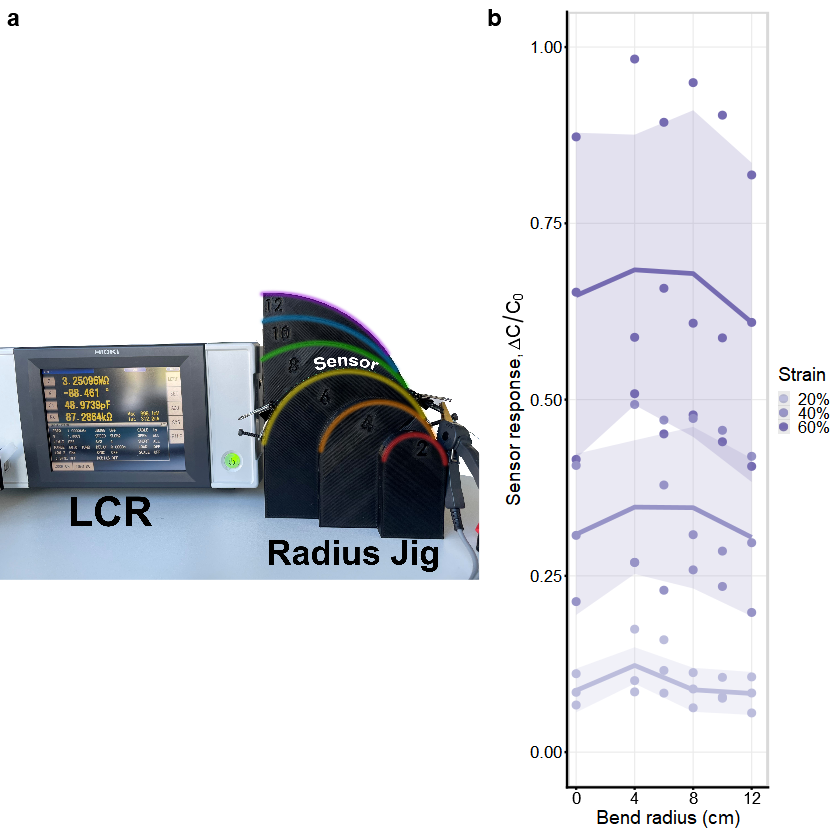

In [27]:
plot_grid(exp_setup, plt1, nrow=1, rel_widths=c(1.33, 1), rel_heights=c(1, 1), labels=c("a", "b"))
ggsave('FigS7.png', width=180, height=75, units="mm", scale=1.5, bg="white", dpi=600)
ggsave('FigS7.eps', width=180, height=75, units="mm", scale=1.5, bg="white", device=cairo_ps, fallback_resolution=600)